In [6]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 

import numpy as np

import warnings
warnings.filterwarnings("ignore")

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [16]:
data = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class=1, random_state=5)

In [41]:
colors = ListedColormap(['red', 'blue', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen'])

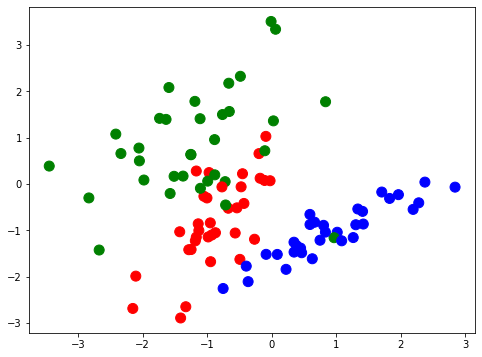

In [42]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), 
              c=data[1], cmap=colors, s=100)

In [44]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data[0], 
                                                                                     data[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

#### DecisionTreeClassifier

In [45]:
classifier = tree.DecisionTreeClassifier(random_state=1)
classifier.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [46]:
predictions = classifier.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7333333333333333

In [47]:
predictions

array([2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 1, 1])

#### Grid

In [48]:
def get_grid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [49]:
def plot_decision(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_grid(train_data)
    grid_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, grid_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, grid_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

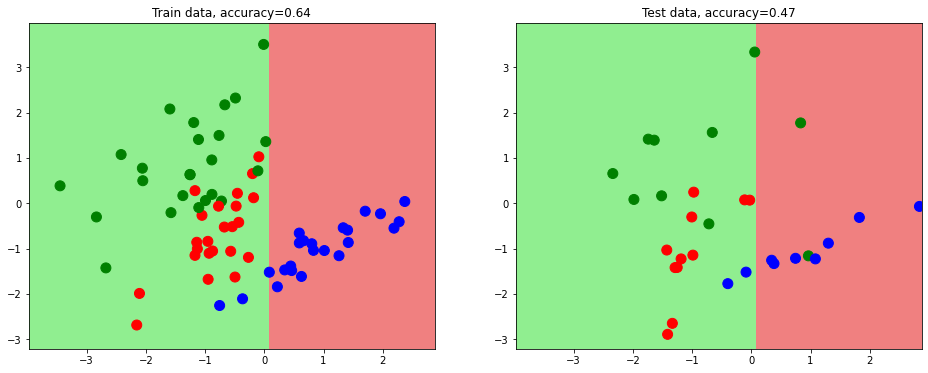

In [50]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision(estimator, train_data, train_labels, test_data, test_labels)

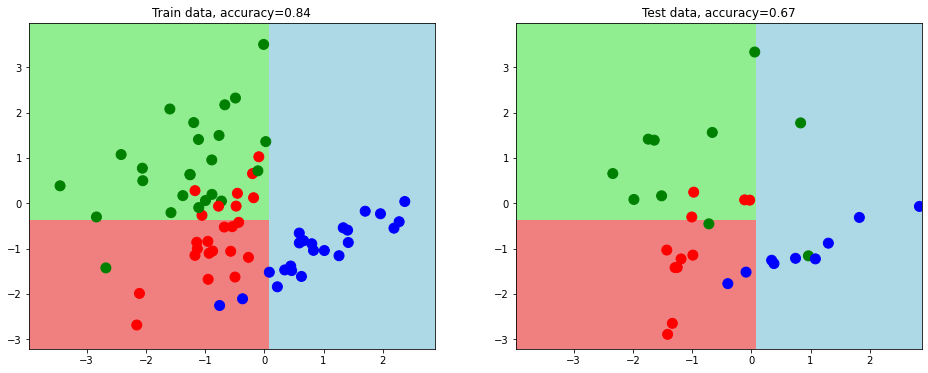

In [51]:
plot_decision(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

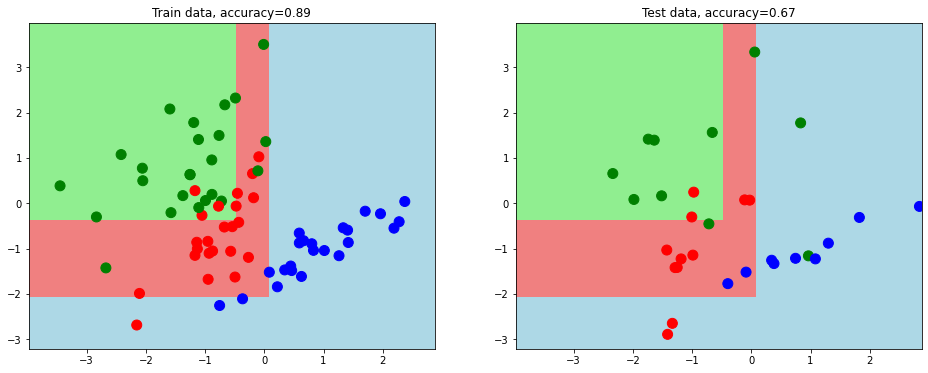

In [52]:
plot_decision(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

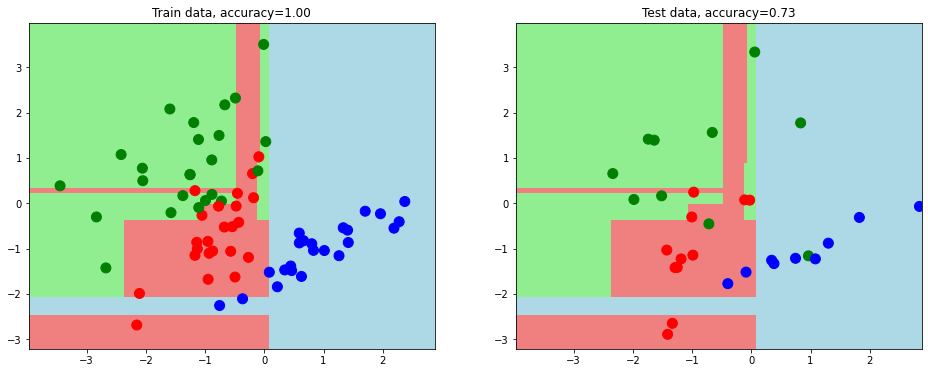

In [53]:
plot_decision(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

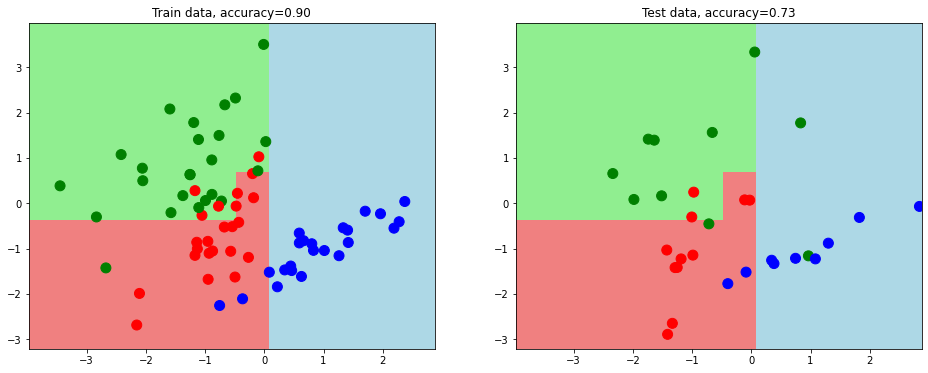

In [54]:
plot_decision(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4), 
                      train_data, train_labels, test_data, test_labels)

Подбираем максимальную глубину и минимальное количество элементов в листе. Для этого смотрим скор на тестовой выборке и используем визуализацию